# 네이버 식당(호호식당-대학로) 리뷰 크롤링

#### beautifulsoup4, selenium 설치

In [1]:
#!pip3 install beautifulsoup4

In [2]:
#!pip install selenium

#### 필요한 패키지 임폴트

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep
import requests
import re
import pandas as pd
import numpy as np
import os
import time
import urllib.request
from selenium.webdriver.common.keys import Keys

import warnings
warnings.filterwarnings('ignore')

#### 셀레니움을 이용해 크롬드라이브 제어 및 url 가져오기

In [3]:
#/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("https://m.place.naver.com/restaurant/85806567/review/visitor?entry=ple")
#time.sleep(2)

In [95]:
#driver.find_element('xpath','//*[@id="app-root"]/div/div/div/div[5]/div/div/div/div/a[5]').click()

In [8]:
driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')

In [9]:
prev_height = driver.execute_script('return document.body.scrollHeight')

#### 웹자동화 : 더보기 -> 스크롤 반복

In [11]:
while True:
    try:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(2)

        current_height = driver.execute_script('return document.body.scrollHeight')

        
        driver.find_element('xpath','//*[@id="app-root"]/div/div/div/div[7]/div[2]/div[3]/div[2]/a').click()
        
        
        if prev_height == current_height:
            break
              
        prev_height = current_height
        
    except:
        print("마지막 페이지입니다.")
        break
        
#driver.quit()
        

마지막 페이지입니다.


#### 현재페이지의 html 코드 가져오기
    여기서 에러가 발생... 
    모든 리뷰가 코드에 반영되어 있지만 가져오지 못함 
    * 해결방법: driver.page_source를 이용해 현재 페이지 코드를 가져올 수 있었음

In [4]:
soup = BeautifulSoup(driver.page_source,'html.parser')
soup

In [5]:
visit = soup.find_all('div',{'class':'sb8UA'})
visit

#soup.find('a',{'class':'sb8UA'}).get_text()
#soup.find_all('ul',{'class':'sb8UA'})

# n번째 방문 크롤링

In [6]:
visit = soup.find_all('span',{'class':'P1zUJ'})
visit

#soup.find('a',{'class':'sb8UA'}).get_text()
#soup.find_all('ul',{'class':'sb8UA'})

In [22]:
visit1 = soup.find('span',{'class':'P1zUJ'})
visit1

#soup.find('a',{'class':'sb8UA'}).get_text()
#soup.find_all('ul',{'class':'sb8UA'})
visit1.get_text()

'리뷰 8'

In [36]:
visit2 = soup.find_all('div',{'class':'sb8UA'})
visit2[:3]

[<div class="sb8UA"><span class="P1zUJ"><span class="place_blind">최근 방문일</span><time aria-hidden="true">5.9.화</time><span class="place_blind">2023년 5월 9일 화요일</span></span><span class="P1zUJ">1<!-- -->번째 방문</span><span class="P1zUJ">예약</span></div>,
 <div class="sb8UA"><span class="P1zUJ"><span class="place_blind">최근 방문일</span><time aria-hidden="true">5.6.토</time><span class="place_blind">2023년 5월 6일 토요일</span></span><span class="P1zUJ">1<!-- -->번째 방문</span><span class="P1zUJ">예약</span></div>,
 <div class="sb8UA"><span class="P1zUJ"><span class="place_blind">최근 방문일</span><time aria-hidden="true">5.12.금</time><span class="place_blind">2023년 5월 12일 금요일</span></span><span class="P1zUJ">2<!-- -->번째 방문</span><span class="P1zUJ">예약</span></div>]

In [45]:
visit3 = soup.find('div',{'class':'sb8UA'})
visit3

visit_text = visit3.get_text()
print(visit_text)
visit_text[26:28]

최근 방문일5.9.화2023년 5월 9일 화요일1번째 방문예약


'1번'

In [55]:
visit_list = []

for v in visit2:
    
    comment = v.get_text()
    visit_list.append(comment)

#.get_text().strip()

df = pd.DataFrame({'visit_text':visit_list})
df

,visit_text
0,최근 방문일5.9.화2023년 5월 9일 화요일1번째 방문예약
1,최근 방문일5.6.토2023년 5월 6일 토요일1번째 방문예약
2,최근 방문일5.12.금2023년 5월 12일 금요일2번째 방문예약
3,최근 방문일5.25.목2023년 5월 25일 목요일1번째 방문영수증
4,최근 방문일3.31.금2023년 3월 31일 금요일1번째 방문예약
...,...
1563,별점5최근 방문일19.2.26.화2019년 2월 26일 화요일1번째 방문영수증
1564,별점4최근 방문일19.4.3.수2019년 4월 3일 수요일1번째 방문영수증
1565,별점5최근 방문일19.3.2.토2019년 3월 2일 토요일1번째 방문영수증
1566,별점4최근 방문일19.3.14.목2019년 3월 14일 목요일1번째 방문영수증


In [56]:
visit_list[:5]

['최근 방문일5.9.화2023년 5월 9일 화요일1번째 방문예약',
 '최근 방문일5.6.토2023년 5월 6일 토요일1번째 방문예약',
 '최근 방문일5.12.금2023년 5월 12일 금요일2번째 방문예약',
 '최근 방문일5.25.목2023년 5월 25일 목요일1번째 방문영수증',
 '최근 방문일3.31.금2023년 3월 31일 금요일1번째 방문예약']

In [58]:
import re

pattern = r'(\d+)번째'
numbers = []

for sentence in visit_list:
    match = re.search(pattern, sentence)
    if match:
        number = match.group(1)
        numbers.append(number)

len(numbers)

1568

In [60]:
df["nth_visit"] = numbers
df.head()

,visit_text,nth_visit
0,최근 방문일5.9.화2023년 5월 9일 화요일1번째 방문예약,1
1,최근 방문일5.6.토2023년 5월 6일 토요일1번째 방문예약,1
2,최근 방문일5.12.금2023년 5월 12일 금요일2번째 방문예약,2
3,최근 방문일5.25.목2023년 5월 25일 목요일1번째 방문영수증,1
4,최근 방문일3.31.금2023년 3월 31일 금요일1번째 방문예약,1


In [75]:
nth_list= df["nth_visit"].value_counts()
nth_list

1     1480
2       69
3       14
4        2
7        1
12       1
9        1
Name: nth_visit, dtype: int64

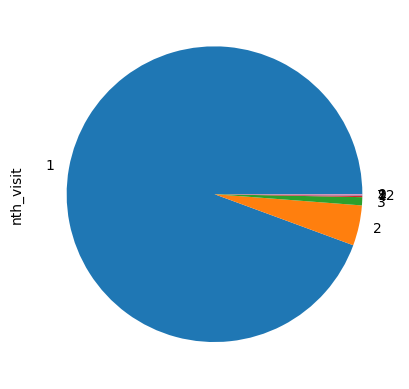

In [93]:
import matplotlib.pyplot as plt

df["nth_visit"].value_counts().plot(kind='pie')
plt.savefig("재방문 파이차트.jpg")

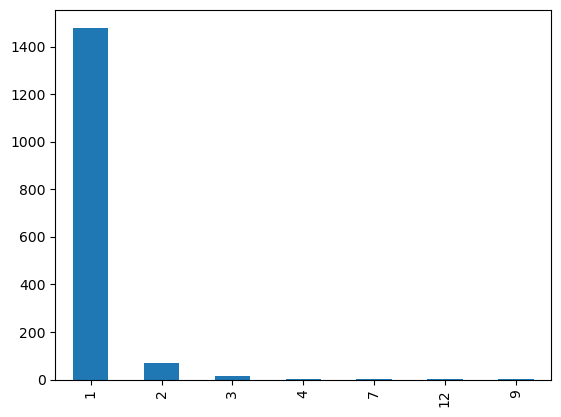

In [94]:
df["nth_visit"].value_counts().plot(kind='bar')
plt.savefig("재방문 바차트.jpg")

In [103]:
print(nth_list)

again_visit_sum = sum(nth_list[1:])
again_visit_sum

print("==================================")

again_visit_percent = (again_visit_sum / sum(nth_list))*100

print("재방문율",round(again_visit_percent,3), "%")

1     1480
2       69
3       14
4        2
7        1
12       1
9        1
Name: nth_visit, dtype: int64
재방문율 5.612 %


In [163]:
first_visit = nth_list[0]
again_visit = nth_list[1]
more_three = sum(nth_list[2:])

print("첫 방문: ",first_visit)
print("재 방문: ",again_visit)
print("재재..방문: ",more_three)


첫 방문:  1480
재 방문:  69
재재..방문:  19


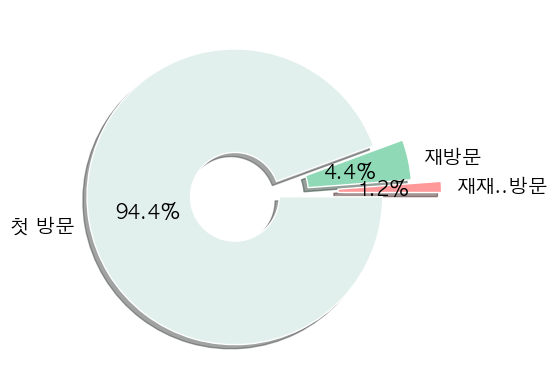

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='AppleGothic',size=14) 

ratio = [first_visit, again_visit, more_three]
labels = ['첫 방문', '재방문', '재재..방문']
explode = [0.10, 0.1, 0.30]
colors = [ 'whitesmoke','silver','gold']
colors1 = ['#e1f0ec', '#8fd9b6','#ff9999',]
wedgeprops={'width': 0.7, 'edgecolor': 'w'}

plt.pie(ratio, labels=labels, autopct='%.1f%%',counterclock=False,
        explode=explode,colors=colors1,shadow=True,wedgeprops=wedgeprops)

plt.savefig("재방문 파이차트6.jpg")
plt.show()